Connect to the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ed10/train.csv_VsW9EGx.zip')
test = pd.read_csv('/content/drive/MyDrive/ed10/test.csv_yAFwdy2.zip')
submission = pd.read_csv('/content/drive/MyDrive/ed10/sample_submission_iA3afxn.csv')

In [ ]:
train.shape, test.shape

((381109, 12), (127037, 11))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [ ]:
test.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [ ]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
[print(i,train[i].nunique(),train[i].unique()) for i in train.columns]

id 381109 [     1      2      3 ... 381107 381108 381109]
Gender 2 ['Male' 'Female']
Age 66 [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License 2 [1 0]
Region_Code 53 [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured 2 [0 1]
Vehicle_Age 3 ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage 2 ['Yes' 'No']
Annual_Premium 48838 [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Policy_Sales_Channel 155 [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65. 

[None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
data = pd.concat([train, test])
data.reset_index(inplace=True, drop=True)
train.shape, test.shape, data.shape

((381109, 12), (127037, 11), (508146, 12))

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


Univariate Analysis

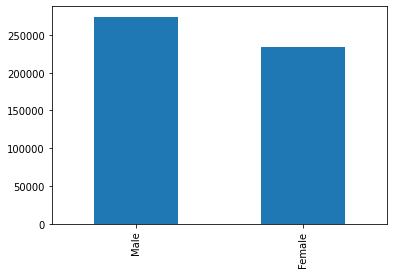

In [ ]:
data['Gender'].value_counts().plot(kind='bar')

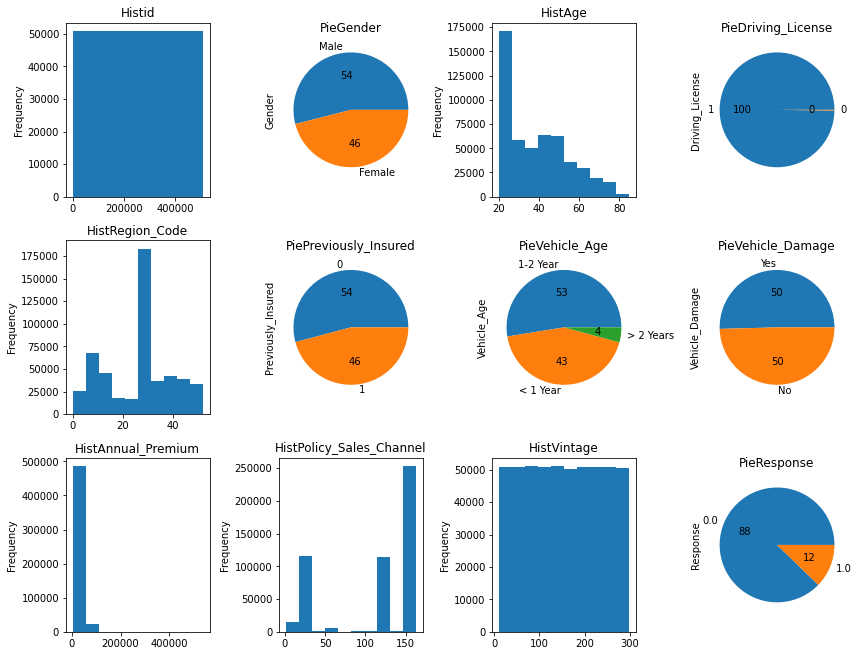

In [ ]:
fig = plt.figure(figsize=(12,12))

for i, col in enumerate(data.columns):
  fig.add_subplot(4,4,i+1)
  if data[col].nunique() < 50:
    t = "Pie" + col
    data[col].value_counts().plot(kind='pie', title=t, autopct='%.0f')
  else:
    t = "Hist" + col
    data[col].plot(kind='hist', title=t)
fig.tight_layout()

bivariate analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


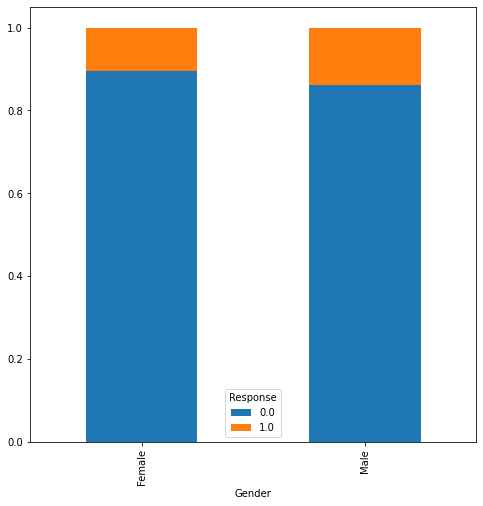

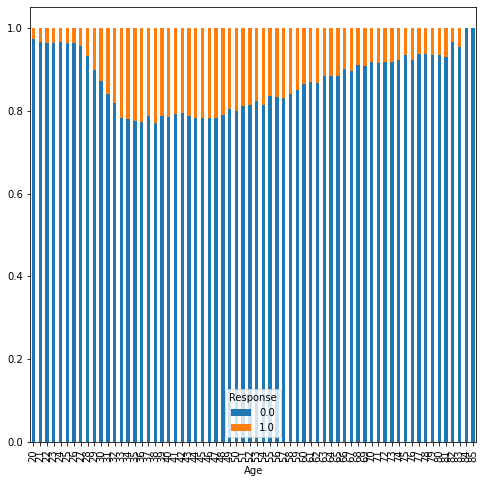

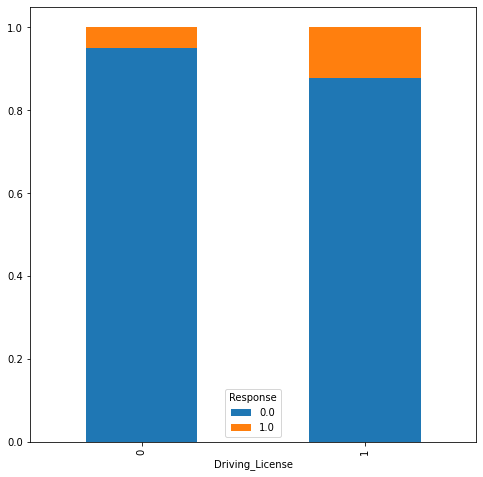

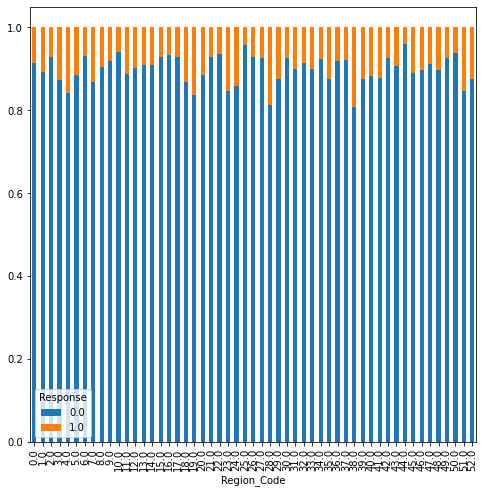

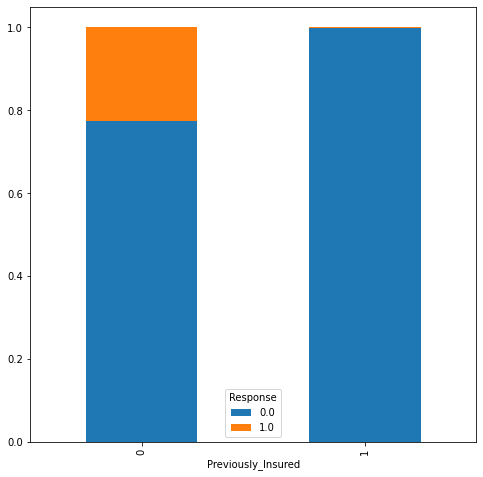

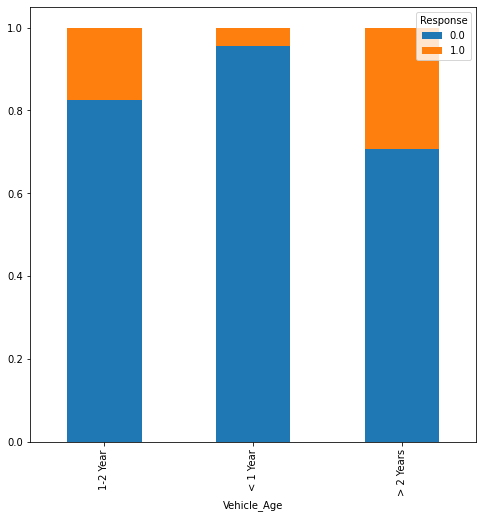

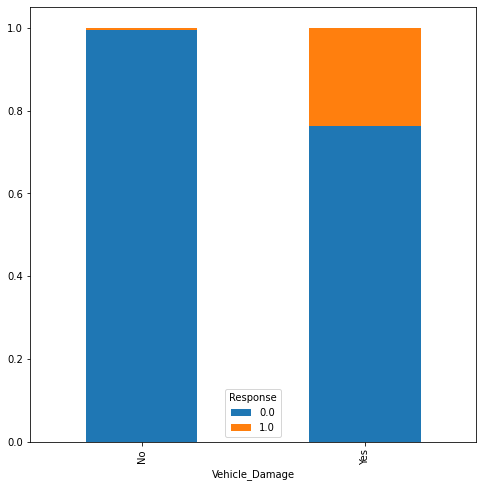

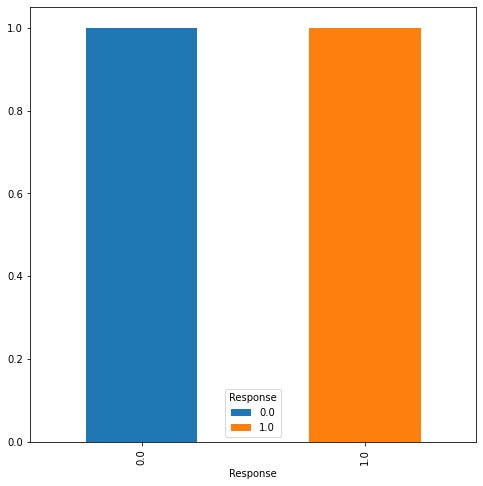

In [ ]:
tgt_col = 'Response'
for i, col in enumerate(data.columns):
  fig.add_subplot(4,4,i+1)
  cross = pd.crosstab(data[col],data[tgt_col])
  if data[col].nunique() < 100:
    cross.div(cross.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))

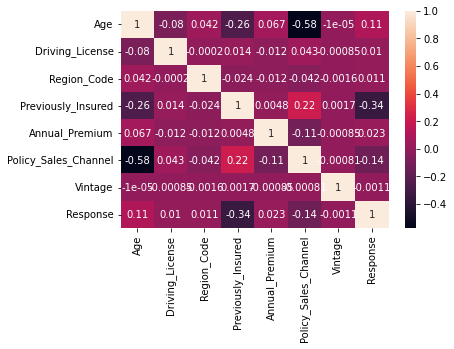

In [ ]:
sns.heatmap(data.drop(columns=['id']).corr(),annot=True)

Preprocessing

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [ ]:
data['Gender'] = data['Gender'].replace({"Female":0, "Male":1})
data['Vehicle_Age'] = data['Vehicle_Age'].replace({"< 1 Year":0,"1-2 Year":1,"> 2 Years":2})
data['Vehicle_Damage'] = data['Vehicle_Damage'].replace({'No':0,'Yes':1})

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [ ]:
from imblearn.pipeline import Pipeline

In [ ]:
num_cols = data.drop(columns=['Response','id']).select_dtypes(include=np.number).columns
cat_cols = data.drop(columns=['Response','id']).select_dtypes(exclude=np.number).columns

#num_cols = data.select_dtypes(include=np.number).columns
#cat_cols = data.select_dtypes(exclude=np.number).columns

print('Numerical columns:',num_cols)
print('Categorical columns:',cat_cols)

num_pipe = Pipeline([('scaler',StandardScaler())])

num_cols = data.drop(columns=['Response','id']).select_dtypes(include=np.number).columns
cat_cols = data.drop(columns=['Response','id']).select_dtypes(exclude=np.number).columns
print('Numerical columns:',num_cols)
print('Categorical columns:',cat_cols)

preprocess_ct = ColumnTransformer([ ('num',num_pipe,num_cols)])

Numerical columns: Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')
Categorical columns: Index([], dtype='object')
Numerical columns: Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')
Categorical columns: Index([], dtype='object')


In [ ]:
pre1train = data[data.Response.notna()]
pre1test = data[data.Response.isna()]
pre1train.shape, pre1test.shape

((381109, 12), (127037, 12))

In [ ]:
pre1train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [ ]:
df = pre1train
train_X, test_X, train_y, test_y = train_test_split(df.drop(['id','Response'],axis=1),df['Response'].astype(int), \
                                                    test_size=.2,shuffle=True,random_state=42, stratify=df['Response'])
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((304887, 10), (76222, 10), (304887,), (76222,))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
def run_model(model, train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    
    pred_train_metrics = roc_auc_score(train_y, pred_train)
    pred_test_metrics = roc_auc_score(test_y, pred_test)
    
    print("Results:",pred_train_metrics, pred_test_metrics)
    return model, pred_train_metrics, pred_test_metrics

In [ ]:
models_name = ['LogisticRegression']
models = LogisticRegression(penalty='none')

#for model in models:
pipe = Pipeline([('preprocess',preprocess_ct),
                 ('model',models)])
print(models_name)
model_steps, train_Roc, test_Roc = run_model(pipe, train_X, train_y, test_X, test_y)



['LogisticRegression']
Results: 0.5007145134125648 0.500761537069816


In [ ]:
train['Response'].value_counts(normalize=True)*100

0    87.743664
1    12.256336
Name: Response, dtype: float64

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
result =[]
models_name = ['LogisticRegression','Lasso','Ridge','ElasticNet','RandomForestClassifier','GradientBoostingClassifier','XGBClassifier']
models = [LogisticRegression(penalty='none'),LogisticRegression(penalty='l1', solver='saga'),LogisticRegression(penalty='l2')
        ,LogisticRegression(penalty='elasticnet',l1_ratio=0.5,solver='saga'),RandomForestClassifier(bootstrap=False),
        GradientBoostingClassifier(),XGBClassifier()]

for model in models:
  pipe = Pipeline([('preprocess',preprocess_ct),
                  ('smote',sm),
                  ('model',model)])
  print(model)
  model_steps, train_Roc, test_Roc = run_model(pipe, train_X, train_y, test_X, test_y)
  result.append([model,models_name,model_steps, train_Roc, test_Roc])
  resdf = pd.DataFrame(result, columns=["model","models_name","model_steps", "train_Roc", "test_Roc"])
  resdf["diff"] = resdf["test_Roc"] - resdf["train_Roc"]
  resdf


LogisticRegression(penalty='none')
Results: 0.7836447675240363 0.7847216588355925
LogisticRegression(penalty='l1', solver='saga')
Results: 0.7836447675240363 0.7847216588355925
LogisticRegression()
Results: 0.7836447675240363 0.7847216588355925
LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')
Results: 0.7836447675240363 0.7847216588355925
RandomForestClassifier(bootstrap=False)
Results: 0.9995584457289659 0.6012697710294302
GradientBoostingClassifier()
Results: 0.7889245415525596 0.7886887457886849
XGBClassifier()
Results: 0.790863537767843 0.789894399578382


In [ ]:
resdf

,model,models_name,model_steps,train_Roc,test_Roc,diff
0,LogisticRegression(penalty='none'),"[LogisticRegression, Lasso, Ridge, ElasticNet,...","(ColumnTransformer(transformers=[('num',\n ...",0.783645,0.784722,0.001077
1,"LogisticRegression(penalty='l1', solver='saga')","[LogisticRegression, Lasso, Ridge, ElasticNet,...","(ColumnTransformer(transformers=[('num',\n ...",0.783645,0.784722,0.001077
2,LogisticRegression(),"[LogisticRegression, Lasso, Ridge, ElasticNet,...","(ColumnTransformer(transformers=[('num',\n ...",0.783645,0.784722,0.001077
3,"LogisticRegression(l1_ratio=0.5, penalty='elas...","[LogisticRegression, Lasso, Ridge, ElasticNet,...","(ColumnTransformer(transformers=[('num',\n ...",0.783645,0.784722,0.001077
4,"(DecisionTreeClassifier(max_features='auto', r...","[LogisticRegression, Lasso, Ridge, ElasticNet,...","(ColumnTransformer(transformers=[('num',\n ...",0.999558,0.601270,-0.398289
5,([DecisionTreeRegressor(criterion='friedman_ms...,"[LogisticRegression, Lasso, Ridge, ElasticNet,...","(ColumnTransformer(transformers=[('num',\n ...",0.788925,0.788689,-0.000236
6,XGBClassifier(),"[LogisticRegression, Lasso, Ridge, ElasticNet,...","(ColumnTransformer(transformers=[('num',\n ...",0.790864,0.789894,-0.000969


In [ ]:
fin_model = resdf.loc[6][0]
fin_pipe = Pipeline([('preprocess',preprocess_ct),
                  ('smote',sm),
                  ('model',fin_model)])

X = df.drop(['id','Response'],axis=1)
y = df['Response']
fin_pipe.fit(X,y)

pred_y = fin_pipe.predict(X)
roc_auc_score(y,pred_y)

0.790277321041112

In [ ]:
test_X = pre1test.drop(['id'],axis=1)
pred_y_test = fin_pipe.predict(test_X)
print(pred_y_test)

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
submission['Response'] = pred_y_test
submission.to_csv('xgb_submission1.csv',index=False)

In [ ]:
display(pred_y_test)

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
clf1 = resdf.loc[4][0] # RF
clf2 = resdf.loc[5][0] # GB
clf3 = resdf.loc[6][0] # XGB

print( clf1, clf2, clf3)

finclf = LogisticRegression()

eclf = StackingClassifier(estimators=[ ('RF',clf1), ('GB',clf2), ('XBG',clf3)], final_estimator=finclf)

fin_pipe = Pipeline([('preprocess',preprocess_ct),
                  ('smote',sm),
                  ('model',eclf)])


X = df.drop(['id','Response'],axis=1)
y = df['Response']
fin_pipe.fit(X,y)

pred_y = fin_pipe.predict(X)
roc_auc_score(y,pred_y)



RandomForestClassifier(bootstrap=False) GradientBoostingClassifier() XGBClassifier()


0.9995800156827972

In [193]:
test_X = pre1test.drop(['id'],axis=1)
pred_y_test = fin_pipe.predict(test_X)
print(pred_y_test)

[0. 1. 0. ... 0. 0. 0.]


In [194]:
submission['Response'] = pred_y_test
submission.to_csv('stacking_submission1.csv',index=False)